# Warp, Threshold, and Map

# Import libraries

In [1]:
# Import some packages from matplotlib

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read Image

In [13]:
# read the example image

image = mpimg.imread('images/sample.jpg')

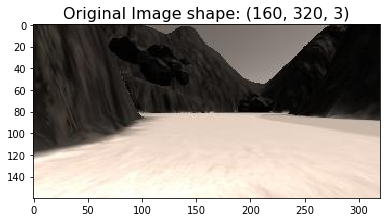

In [14]:
# Show the image and shape

f, (ax1) = plt.subplots(1, 1,figsize=(12, 3))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image shape: '+str(image.shape), fontsize=16)

plt.show()

# Wrapping Function

In [15]:
# define function to transform the image

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

In [16]:
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel squaimagere represents 1 square meter

hs_size = 10/2             # half the size of one square
b_ofst  = 6                # bottom offset to account for distance from rover edge to 1st camera visiable point
x_cntr  = image.shape[1]/2 # center of the image x axis
y_end   = image.shape[0]   # end of y or bottom of image

source      = np.float32([
                  [14, 140],      # Left Bottom
                  [301 ,140],     # Right Bottom
                  [200, 96],      # Right Top
                  [118, 96]       # Left Top
                  ])              # above data captured from simulator

destination = np.float32([
                  [x_cntr - hs_size, y_end - b_ofst],             # Left Bottom
                  [x_cntr + hs_size, y_end - b_ofst],             # Right Bottom
                  [x_cntr + hs_size, y_end - 2*hs_size - b_ofst], # Right Top
                  [x_cntr - hs_size, y_end - 2*hs_size - b_ofst], # Left Top
                  ])

# Color Thresholding Function

In [17]:
# function that will return a mask with all pixels above a certian color threshold

def color_thresh(img, rgb_thresh=(0, 0, 0)):

    color_select = np.zeros_like(img[:,:,0])

    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])

    color_select[above_thresh] = 1

    return color_select

In [18]:
# Define color selection criteria

red_threshold = 160
green_threshold = 160
blue_threshold = 160

rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# Rover-Centric Coordinates Function

In [19]:
def rover_coords(binary_img):

    ypos, xpos = binary_img.nonzero()
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel

# Perform Warping and Thresholding

In [20]:
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_threshold)

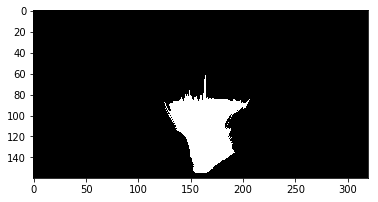

In [21]:
plt.imshow(colorsel, cmap='gray')
plt.show()

# Perform Rover-Centric Coordinates

In [22]:
xpix, ypix = rover_coords(colorsel)

# Plot output

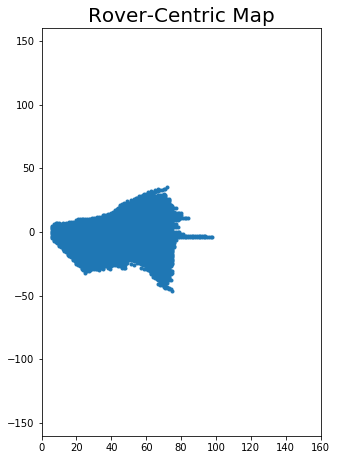

In [23]:
# Plot the map in rover-centric coords
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show() # Uncomment if running on your local machine